In [1]:
## CE 295 - Energy Systems and Control
# HW 1 : Battery Modeling, Analysis, and Control
# Franklin Zhao, SID 3033030808
# Prof. Moura
# Due Date Feb 2

# Franklin_Zhao_HW1.ipynb

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
from __future__ import division

fs = 15; # Font Size for plots

[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]
[3.4707     3.53339386 3.58770573 3.63438105 3.67416528 3.70780384
 3.73604219 3.75962576 3.7793     3.79581035 3.80990226 3.82232116
 3.8338125  3.84512172 3.85699427 3.87017559 3.88541111 3.90344629
 3.92502656 3.95089737 3.98180417 4.01849238 4.06170747 4.11219486
 4.1707    ]


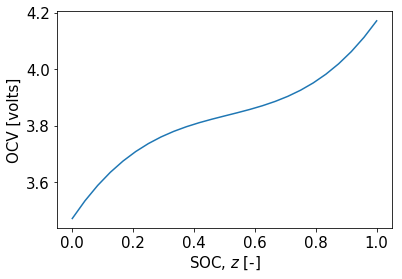

In [3]:
## Part(a): Model Parameters

# ECM Model Parameters
Q = 3600 # [Coulombs]
R1 = 0.05 # [Ohms]
R2 = 0.005 # [Ohms]
C = 500 # [Farads]

# OCV polynomial coefficients
p_0 = 3.4707
p_1 = 1.6112
p_2 = -2.6287
p_3 = 1.7175

# Plot nonlinear OCV function
z_vec = np.linspace(0,1,25)
OCV = p_0 + p_1*z_vec + p_2 * (z_vec ** 2) + p_3 * (z_vec ** 3)
print(z_vec)
print(OCV)

plt.plot(z_vec, OCV)
plt.xlabel('SOC, $z$ [-]',fontsize=fs)
plt.ylabel('OCV [volts]',fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.show()

In [4]:
## Part(b): Simulate

# Assemble (A,B) state-space matrices
A = [[0, 0], [0, -1/(R2 * C)]]
B = [[1/Q], [1/C]]
print(A)
print(B)
C_dummy = [1, 1]
D_dummy = R1
print(C_dummy)
print(D_dummy)

# Create state-space model
sys = signal.lti(A, B, C_dummy, D_dummy)

# Create time vector
DeltaT = 1 # Time step size [sec]
t = np.arange(0,10*60,DeltaT)   # Total Simulation time (min*sec/min)
#print('time')
#print(t)

# Input current signals
#print(np.shape(t))
Current = np.zeros_like(t)*0
for k in range(0, len(Current)):
    if (t[k] % 40) < 20:
        Current[k] = -5

# Initial Conditions
z0 = 0.5 # state-of-charge
V_c0 = 0 # capacitor voltage
x0 = [z0,V_c0] # np.array([[z0],[V_c0]])   # Vectorize initial conditions
print('x0')
print(x0)

print(np.shape(x0))
print(np.shape(Current))
print(np.shape(t))

# Simulate linear dynamics (Read documentation on scipy.signal.lsim)
tsim, y, x = signal.lsim2(sys, Current, t, x0)

[[0, 0], [0, -0.4]]
[[0.0002777777777777778], [0.002]]
[1, 1]
0.05
x0
[0.5, 0]
(2,)
(600,)
(600,)


In [8]:
# Parse out states
z = x[:,0]
V_c = x[:,1]

# Compute nonlinear output function
V_nl = p_0 + p_1 * z + p_2 * (z ** 2) + p_3 * (z ** 3) + V_c + R1 * Current

### Compute linearized output function
# Linearization Points
zeq = 0.5   # state-of-charge
V_ceq = 0 # capacitor voltage
Ieq = 0 # Current

V_lin = V_c + (p_1 + p_2 + 0.75 * p_3) * z + R1 * Current + p_0 - 0.25 * p_2 - 0.25 * p_3 

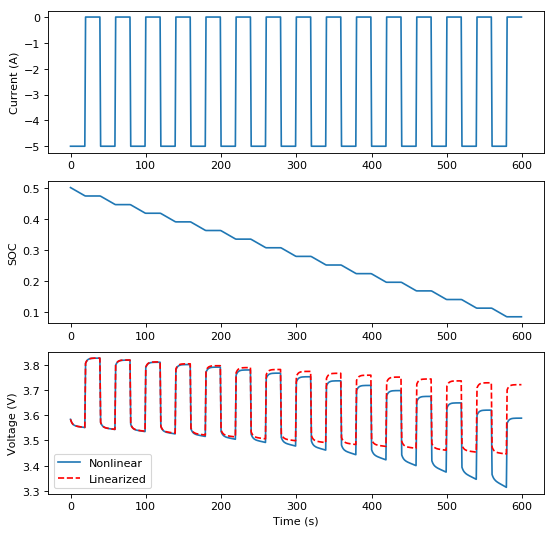

In [9]:
## Part(b): Plot results

# Current
plt.figure(num=2, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3, 1, 1)
plt.plot(t, Current)
plt.ylabel('Current (A)')

# State-of-charge
plt.subplot(3, 1, 2)
plt.plot(t, z)
plt.ylabel('SOC')

# Nonlinear and linearized voltage
plt.subplot(3, 1, 3)
plt.plot(t, V_nl,label="Nonlinear")
plt.plot(t, V_lin, 'r--', label="Linearized")
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend()

plt.show()